In [14]:
from graphviz import Digraph
from IPython.display import display


class Node:
    def __init__(self, value:int):
        self.value = value
        self.next = None


class LinkedList:
    def __init__(self, value:int|None=None):
        self.head = Node(value)  if value is not None else None # Maintain a `head` pointer

    def append(self, value:int):
        if not self.head:
            self.head = Node(value)
            return

        current = self.head
        while current.next:
            current = current.next
        current.next = Node(value)

    def is_empty(self):
        """Returns True if the linked list is empty, otherwise False."""
        return self.head is None

    def remove_tail(self):
        if not self.head or not self.head.next:
            self.head = None  # If only one node, set head to None
            return

        current = self.head
        while current.next and current.next.next:
            current = current.next

        current.next = None  # Remove tail


    def remove_head(self):
        if not self.head or not self.head.next:
            self.head = None  # If only one node, set head to None
            return

        self.head = self.head.next  # Update head reference

    def reverse(self):
        prev = None
        current = self.head

        while current:
            next_node = current.next  # Store next node
            current.next = prev  # Reverse the link
            prev = current  # Move prev forward
            current = next_node  # Move current forward

        self.head = prev

    def visualize(self):
        """Displays a Graphviz visualization of the linked list inline in Jupyter."""
        dot = Digraph()
        dot.attr(rankdir="LR")
        current = self.head
        visited = set()  # To avoid infinite loops in case of cycles
        while current:
            if id(current) in visited:  # Detect cycles
                break
            visited.add(id(current))

            dot.node(str(id(current)), str(current.value))
            if current.next:
                dot.edge(str(id(current)), str(id(current.next)))  # Connect to next node
            else:
                dot.node("None", "None", shape="plaintext")  # Create None node
                dot.edge(str(id(current)), "None")  # Last node points to None
            current = current.next

        display(dot)

After Reversing:
7 -> 9 -> 6 -> 3 -> 2 -> None


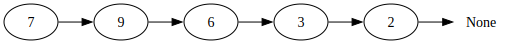

In [8]:
# ✅ Example Usage:
ll = LinkedList(2)
ll.append(3)
ll.append(6)
ll.append(9)
ll.append(7)

ll.visualize()



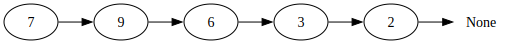

In [10]:
ll.reverse()  # ✅ No need to reassign, `reverse()` modifies `self.head` directly

ll.visualize()